## Project for Machine Learning and Statistics module
#### Hayley Doherty G00387849
---

This notebook shows how I developed a model that can be used to predict power output from a given wind speed value.  

Machine learning is used for complicated tasks that are too difficult and complex to be coded directly by humans.  In order to perform machine learning lots of data is needed to be used as examples of the correct output for a specified input in order to 'teach' the machine how to perform the task of generating output for input values it has not been trained with [1].

Neural networking is a machine learning technique that has become a popular tool for a range of applications such as speech recognition and image classification.  It is the technique I will use to develop a model that will be able to predict power output from a given wind speed value.

In [1]:
# import data
import pandas as pd
# create arrays
import numpy as np
# Creating Plots
import matplotlib.pyplot as plt
# neural networks
import tensorflow.keras as kr

In [2]:
# Read in csv 
df = pd.read_csv("powerproduction.csv")
df

,speed,power
0,0.000,0.0
1,0.125,0.0
2,0.150,0.0
3,0.225,0.0
4,0.275,0.0
...,...,...
495,24.775,0.0
496,24.850,0.0
497,24.875,0.0
498,24.950,0.0


In [3]:
# create variables for x and y axis
x = np.array(df['speed'])
y = np.array(df['power'])

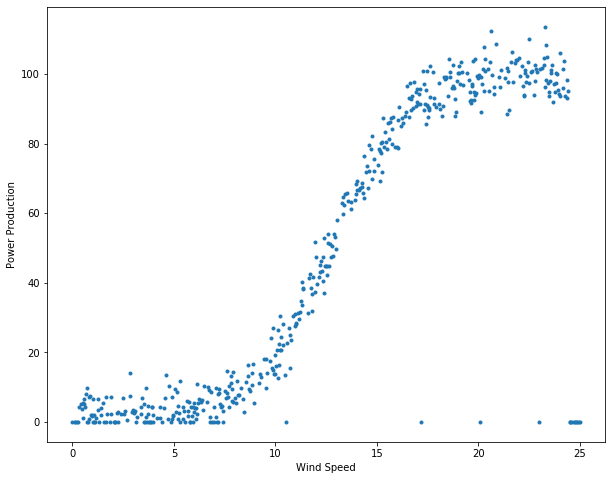

In [31]:
# plot the data
plt.figure(figsize=(10, 8))
plt.plot(x, y, '.')
plt.xlabel('Wind Speed')
plt.ylabel('Power Production')
plt.show()

### Prepare the Data
***
Looking at the dataset to be used for developing the model, there are a number of points that look very different from the others.  For relatively high values for wind speed (over 7.5), some values for power production remain at zero.  This may suggest that the wind turbine was turned off or not working at these times as we would expect some generation of power at wind speeds above this level.  So in order to ensure that the model created is as accurate as possible at predicting the power production from a given wind speed, these outlying data points will be removed from the data used to train the model.

In [78]:
# deletes empty rows
df = df.dropna(how = 'all')
# delete rows where the power is 0 and wind speed is equal to or above 5
drop_rows = df[(df['power'] == 0) & (df['speed'] >= 5.0)].index
df.drop(drop_rows, inplace = True)

In [79]:
# the df now contain 477 rows meaning 23 were deleted
df

,speed,power
0,0.000,0.000
1,0.125,0.000
2,0.150,0.000
3,0.225,0.000
4,0.275,0.000
...,...,...
485,24.249,103.700
486,24.299,93.694
487,24.349,93.078
488,24.374,98.223


In [80]:
x = df['speed']
y = df['power']

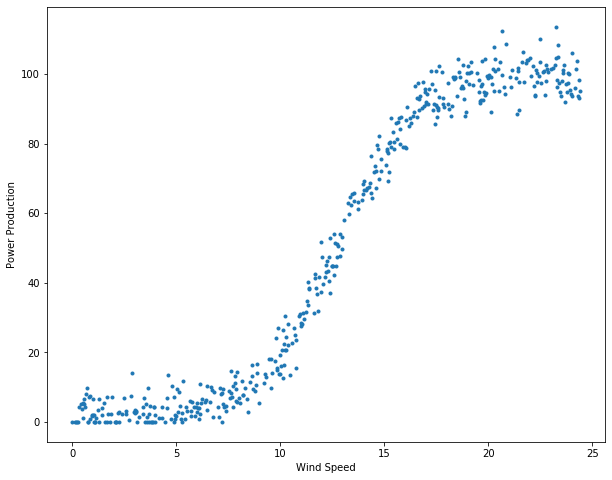

In [37]:
# a plot the data with the outliers removed
plt.figure(figsize=(10, 8))
plt.plot(x, y, '.')
plt.xlabel('Wind Speed')
plt.ylabel('Power Production')
plt.show()

Keras is the recommended library for deep learning in python.  models in keras are defined as a sequence of layers an epoch is the number of iterations over the whole dataset.  The first layer in the model (actually the second layer as the first is the data)[2], has 25 nodes/neurons which is chosen arbitrarily, an input shape of (1,) as our input data is 1-dimensional and the activation function is sigmoid.  An activation function is used to determine whether or not a specific neuron is activated [3]. 

In [112]:
# Defining the models architecture
model = kr.models.Sequential()
# adding layers
model.add(kr.layers.Dense(25, input_shape=(1,), activation='sigmoid'))
model.add(kr.layers.Dense(1, activation='linear'))
# preparing model for training
model.compile(kr.optimizers.Adam(lr=0.001), loss='mean_squared_error', metrics=[kr.metrics.Accuracy()])

In [113]:
# training the model
model.fit(x, y, epochs=750, batch_size=10, verbose = 2)

Epoch 1/750
48/48 - 0s - loss: 4123.3477 - accuracy: 0.0000e+00
Epoch 2/750
48/48 - 0s - loss: 4031.6621 - accuracy: 0.0000e+00
Epoch 3/750
48/48 - 0s - loss: 3958.2327 - accuracy: 0.0000e+00
Epoch 4/750
48/48 - 0s - loss: 3886.0730 - accuracy: 0.0000e+00
Epoch 5/750
48/48 - 0s - loss: 3781.4678 - accuracy: 0.0000e+00
Epoch 6/750
48/48 - 0s - loss: 3681.6101 - accuracy: 0.0000e+00
Epoch 7/750
48/48 - 0s - loss: 3614.0454 - accuracy: 0.0000e+00
Epoch 8/750
48/48 - 0s - loss: 3558.8872 - accuracy: 0.0000e+00
Epoch 9/750
48/48 - 0s - loss: 3507.7815 - accuracy: 0.0000e+00
Epoch 10/750
48/48 - 0s - loss: 3460.0471 - accuracy: 0.0000e+00
Epoch 11/750
48/48 - 0s - loss: 3413.6780 - accuracy: 0.0000e+00
Epoch 12/750
48/48 - 0s - loss: 3367.6384 - accuracy: 0.0000e+00
Epoch 13/750
48/48 - 0s - loss: 3304.1624 - accuracy: 0.0000e+00
Epoch 14/750
48/48 - 0s - loss: 3244.2351 - accuracy: 0.0000e+00
Epoch 15/750
48/48 - 0s - loss: 3192.5212 - accuracy: 0.0000e+00
Epoch 16/750
48/48 - 0s - loss: 31

Epoch 128/750
48/48 - 0s - loss: 345.5088 - accuracy: 0.0000e+00
Epoch 129/750
48/48 - 0s - loss: 336.7491 - accuracy: 0.0000e+00
Epoch 130/750
48/48 - 0s - loss: 327.8717 - accuracy: 0.0000e+00
Epoch 131/750
48/48 - 0s - loss: 319.3656 - accuracy: 0.0000e+00
Epoch 132/750
48/48 - 0s - loss: 310.9271 - accuracy: 0.0000e+00
Epoch 133/750
48/48 - 0s - loss: 302.6068 - accuracy: 0.0000e+00
Epoch 134/750
48/48 - 0s - loss: 294.6002 - accuracy: 0.0000e+00
Epoch 135/750
48/48 - 0s - loss: 286.8069 - accuracy: 0.0000e+00
Epoch 136/750
48/48 - 0s - loss: 279.1161 - accuracy: 0.0000e+00
Epoch 137/750
48/48 - 0s - loss: 271.3418 - accuracy: 0.0000e+00
Epoch 138/750
48/48 - 0s - loss: 264.3321 - accuracy: 0.0000e+00
Epoch 139/750
48/48 - 0s - loss: 256.7411 - accuracy: 0.0000e+00
Epoch 140/750
48/48 - 0s - loss: 249.7659 - accuracy: 0.0000e+00
Epoch 141/750
48/48 - 0s - loss: 242.7010 - accuracy: 0.0000e+00
Epoch 142/750
48/48 - 0s - loss: 235.6403 - accuracy: 0.0000e+00
Epoch 143/750
48/48 - 0s 

Epoch 256/750
48/48 - 0s - loss: 19.5743 - accuracy: 0.0000e+00
Epoch 257/750
48/48 - 0s - loss: 19.5634 - accuracy: 0.0000e+00
Epoch 258/750
48/48 - 0s - loss: 19.5025 - accuracy: 0.0000e+00
Epoch 259/750
48/48 - 0s - loss: 19.5666 - accuracy: 0.0000e+00
Epoch 260/750
48/48 - 0s - loss: 19.3808 - accuracy: 0.0000e+00
Epoch 261/750
48/48 - 0s - loss: 19.3182 - accuracy: 0.0000e+00
Epoch 262/750
48/48 - 0s - loss: 19.4165 - accuracy: 0.0000e+00
Epoch 263/750
48/48 - 0s - loss: 19.3150 - accuracy: 0.0000e+00
Epoch 264/750
48/48 - 0s - loss: 19.3152 - accuracy: 0.0000e+00
Epoch 265/750
48/48 - 0s - loss: 19.2488 - accuracy: 0.0000e+00
Epoch 266/750
48/48 - 0s - loss: 19.0788 - accuracy: 0.0000e+00
Epoch 267/750
48/48 - 0s - loss: 19.0041 - accuracy: 0.0000e+00
Epoch 268/750
48/48 - 0s - loss: 19.0337 - accuracy: 0.0000e+00
Epoch 269/750
48/48 - 0s - loss: 18.8850 - accuracy: 0.0000e+00
Epoch 270/750
48/48 - 0s - loss: 18.9091 - accuracy: 0.0000e+00
Epoch 271/750
48/48 - 0s - loss: 19.0526

Epoch 385/750
48/48 - 0s - loss: 16.7433 - accuracy: 0.0000e+00
Epoch 386/750
48/48 - 0s - loss: 16.9278 - accuracy: 0.0000e+00
Epoch 387/750
48/48 - 0s - loss: 16.7484 - accuracy: 0.0000e+00
Epoch 388/750
48/48 - 0s - loss: 16.7291 - accuracy: 0.0000e+00
Epoch 389/750
48/48 - 0s - loss: 16.7592 - accuracy: 0.0000e+00
Epoch 390/750
48/48 - 0s - loss: 16.7408 - accuracy: 0.0000e+00
Epoch 391/750
48/48 - 0s - loss: 16.6289 - accuracy: 0.0000e+00
Epoch 392/750
48/48 - 0s - loss: 16.8498 - accuracy: 0.0000e+00
Epoch 393/750
48/48 - 0s - loss: 16.8601 - accuracy: 0.0000e+00
Epoch 394/750
48/48 - 0s - loss: 16.6849 - accuracy: 0.0000e+00
Epoch 395/750
48/48 - 0s - loss: 16.7764 - accuracy: 0.0000e+00
Epoch 396/750
48/48 - 0s - loss: 16.7715 - accuracy: 0.0000e+00
Epoch 397/750
48/48 - 0s - loss: 16.7424 - accuracy: 0.0000e+00
Epoch 398/750
48/48 - 0s - loss: 16.6147 - accuracy: 0.0000e+00
Epoch 399/750
48/48 - 0s - loss: 16.8076 - accuracy: 0.0000e+00
Epoch 400/750
48/48 - 0s - loss: 16.8043

Epoch 514/750
48/48 - 0s - loss: 16.4530 - accuracy: 0.0000e+00
Epoch 515/750
48/48 - 0s - loss: 16.5004 - accuracy: 0.0000e+00
Epoch 516/750
48/48 - 0s - loss: 16.6295 - accuracy: 0.0000e+00
Epoch 517/750
48/48 - 0s - loss: 16.4211 - accuracy: 0.0000e+00
Epoch 518/750
48/48 - 0s - loss: 16.4486 - accuracy: 0.0000e+00
Epoch 519/750
48/48 - 0s - loss: 16.4384 - accuracy: 0.0000e+00
Epoch 520/750
48/48 - 0s - loss: 16.3784 - accuracy: 0.0000e+00
Epoch 521/750
48/48 - 0s - loss: 16.4292 - accuracy: 0.0000e+00
Epoch 522/750
48/48 - 0s - loss: 16.4221 - accuracy: 0.0000e+00
Epoch 523/750
48/48 - 0s - loss: 16.4277 - accuracy: 0.0000e+00
Epoch 524/750
48/48 - 0s - loss: 16.5453 - accuracy: 0.0000e+00
Epoch 525/750
48/48 - 0s - loss: 16.4058 - accuracy: 0.0000e+00
Epoch 526/750
48/48 - 0s - loss: 16.3339 - accuracy: 0.0000e+00
Epoch 527/750
48/48 - 0s - loss: 16.4025 - accuracy: 0.0000e+00
Epoch 528/750
48/48 - 0s - loss: 16.3981 - accuracy: 0.0000e+00
Epoch 529/750
48/48 - 0s - loss: 16.3961

Epoch 643/750
48/48 - 0s - loss: 16.5171 - accuracy: 0.0000e+00
Epoch 644/750
48/48 - 0s - loss: 16.3973 - accuracy: 0.0000e+00
Epoch 645/750
48/48 - 0s - loss: 16.2991 - accuracy: 0.0000e+00
Epoch 646/750
48/48 - 0s - loss: 16.4576 - accuracy: 0.0000e+00
Epoch 647/750
48/48 - 0s - loss: 16.4004 - accuracy: 0.0000e+00
Epoch 648/750
48/48 - 0s - loss: 16.7670 - accuracy: 0.0000e+00
Epoch 649/750
48/48 - 0s - loss: 16.4514 - accuracy: 0.0000e+00
Epoch 650/750
48/48 - 0s - loss: 16.3890 - accuracy: 0.0000e+00
Epoch 651/750
48/48 - 0s - loss: 16.3957 - accuracy: 0.0000e+00
Epoch 652/750
48/48 - 0s - loss: 16.4284 - accuracy: 0.0000e+00
Epoch 653/750
48/48 - 0s - loss: 16.4619 - accuracy: 0.0000e+00
Epoch 654/750
48/48 - 0s - loss: 16.2770 - accuracy: 0.0000e+00
Epoch 655/750
48/48 - 0s - loss: 16.3657 - accuracy: 0.0000e+00
Epoch 656/750
48/48 - 0s - loss: 16.4435 - accuracy: 0.0000e+00
Epoch 657/750
48/48 - 0s - loss: 16.1828 - accuracy: 0.0000e+00
Epoch 658/750
48/48 - 0s - loss: 16.5409

In [76]:
model.summary()

Model: "sequential_17"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_30 (Dense)             (None, 50)                100       
_________________________________________________________________
dense_31 (Dense)             (None, 1)                 51        
Total params: 151
Trainable params: 151
Non-trainable params: 0
_________________________________________________________________


Below I have used the model to predict the power production output using the wind speed values as input to the model and plotted the predictions against wind speed.  The presictions appear relatively accurate as when graphed, they follow the same shape as the 'correct' data that was used to train the model.  Although from the output above the lowest 'loss' value is ~16.18 which is quite high. 

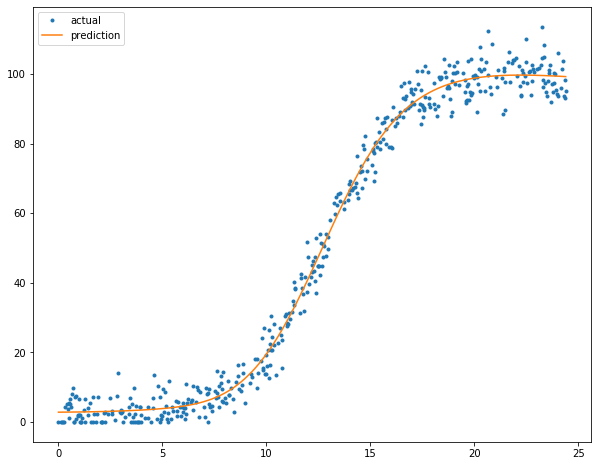

In [116]:
plt.figure(figsize=(10,8))
plt.plot(x, y, '.', label='actual')
plt.plot(x, model.predict(x), label='prediction')
plt.legend();

Below I used the predict function to use the model to predict the expected power output for the wind speed (ws) variable given. 

In [85]:
ws= [15.0]
model.predict(ws)

array([[77.95687]], dtype=float32)

### References
***
[1] a Gentle Introduction to Neural Newtorks for Machine Learning, https://www.codementor.io/@james_aka_yale/a-gentle-introduction-to-neural-networks-for-machine-learning-hkijvz7lp

[2]. A Begginers Guide to building Artificial Neural Networks using Keras in Python, https://towardsdatascience.com/beginners-guide-to-building-artificial-neural-networks-using-keras-in-python-bdc4989dab00

[3]. Keras Tutorial, https://www.tutorialspoint.com/keras/keras_layers.htm